# Task 9.2
# Newton's method in higher dimensions

## Task 9.2.1 
## Solving the linear system of equations $Ax = b + \epsilon \cdot g(x)$ using Newton's method

### Preface / Theory

The Newton method solves the equation $f(x)=0$. Hence, we rearrange the given system of equations:

$$
\begin{array}{llclcl}
                & Ax                          & = & b + \epsilon \cdot g(x) & & \\
\Leftrightarrow & Ax -b - \epsilon \cdot g(x) & = & 0 & = & f(x) \\
\end{array}
$$

Inserting into the equation gives:

$$
f(x)=
\begin{pmatrix}
2x_1+x_2-\epsilon(x_1-x_2)^2 \\
x_1+2x_2-3 \\
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix}
$$
$$
f'(x)=
\begin{pmatrix}
2-2\epsilon(x_1-x_2) & 1-2\epsilon(x_1-x_2) \\
1 & 2 \\
\end{pmatrix}
$$

This nonlinear system of equations can then be solved with the same function as implemented in task 1:
1. compute $f(x_n)$ and $f'(x_n)$
2. compute the correction by solving the linear system $f'(x_n) \delta = -f(x_n)$
3. perform the update $x_{n+1} = x_n + \delta$

The initial guess $x_0$ is obtained by solving the linear system $Ax_0=b$ ignoring the term $\epsilon \cdot g(x)$.

### Implementation

In [1]:
import numpy as np

# Define constants
EPSILON = .01  # Constant value for epsilon
MACHINE_EPS = np.finfo(float).eps  # Machine epsilon value for the floating-point type
A = np.array([[2, 1], [1, 2]])  # Coefficient matrix
b = np.array([0, 3])  # Constant vector

def newton_method(x, f, df, max_iter=100, min_tol=MACHINE_EPS):
    """
    Perform Newton's method to find a root of a function f(x) using its derivative df(x).

    Parameters:
    - x : array_like
        Initial guess for the root.
    - f : callable
        The function whose root is sought.
    - df : callable
        The derivative of the function `f`.
    - max_iter : int, optional
        Maximum number of iterations (default is 100).
    - min_tol : float, optional
        Minimum tolerance for convergence (default is machine epsilon).

    Returns:
    - x : array_like
        Approximation of the root.
    - error : list
        List containing the error (norm of f(x)) at each iteration.
    - min_tol : float
        Minimum tolerance reached during iteration.
    """

    error = []  # Initialize an empty list to store errors at each iteration

    for _ in range(max_iter):
        f_val, df_val = f(x), df(x)  # Compute the value of f and its derivative at x
        x -= np.linalg.solve(df_val, f_val)  # Update x using Newton-Raphson method
        error.append(np.linalg.norm(f_val))  # Compute and store the error (norm of f(x))

        if error[-1] < min_tol:  # Check if the error is below the minimum tolerance
            break  # If converged, exit the loop

    return x, error, min_tol

def f(x):
    """
    Define the function f(x) as an array.

    Parameters:
    - x : array_like
        Input vector.

    Returns:
    - array_like
        Array containing the values of the functions at x.
    """
    return np.array([
        2 * x[0] + x[1] - EPSILON * ((x[0] - x[1]) ** 2),
        x[0] + 2 * x[1] - 3,
    ])

def df(x):
    """
    Define the derivative of the function f(x) as a matrix.

    Parameters:
    - x : array_like
        Input vector.

    Returns:
    - array_like
        Matrix containing the derivatives of f with respect to x.
    """
    return np.array([
        [2 - 2 * EPSILON * (x[0] - x[1]), 1 - 2 * EPSILON * (x[0] - x[1])],
        [1, 2],
    ])

x0 = np.linalg.solve(A, b)  # Initial guess obtained by solving the linear system Ax = b
x_newton, err_newton, tol_newton = newton_method(x0, f, df)  # Apply Newton's method
print(f"Zero found at x = {x_newton}")  # Print the approximation of the root


Zero found at x = [-0.94335081  1.97167541]


### Validation
The found vector $x$ must fulfill the system of equations $Ax=b+\epsilon \cdot f(x)$

In [83]:
g = lambda x1, x2: np.array([(x1 - x2) ** 2, 0])
lhs = np.dot(A, x_newton)
rhs = b + EPS * g(*x_newton)
print("Comparing lhs and rhs of the equation Ax = b+epsilon * f(x)")
print(f"lhs:             Ax = {lhs[0]:.8f}\n"
      f"rhs: b+epsilon*g(x) = {rhs[0]:.8f}")

Comparing lhs and rhs of the equation Ax = b+epsilon * f(x)
lhs:             Ax = 0.08497378
rhs: b+epsilon*g(x) = 0.08497378


## Task 9.2.2
## Solving the linear system of equations $Ax = b + \epsilon \cdot f(x)$ using the simple method

### Preface / Theory

Using the given update rule we can rearrange the equation to solve for $x_{n+1}$:
$$
\begin{array}{llcl}
& Ax_{n+1} & = & b + \epsilon \cdot f(x_n) \\
\Leftrightarrow & x_{n+1} & = & A^{-1}(b + \epsilon \cdot f(x_n)) \\
\end{array}
$$

## Implementation

In [8]:
import numpy as np

EPSILON = .01  # Constant value for epsilon
MACHINE_EPS = np.finfo(float).eps  # Machine epsilon value for the floating-point type

A = np.array([[2, 1], [1, 2]])  # Coefficient matrix
A_inv = np.linalg.inv(A)  # Inverse of the coefficient matrix
b = np.array([0, 3])  # Constant vector


def simple_method(x, max_iter=100, min_tol=MACHINE_EPS):
    """
    Perform a simple iterative method to solve a system of linear equations.

    Parameters:
    - x : array_like
        Initial guess for the solution.
    - max_iter : int, optional
        Maximum number of iterations (default is 100).
    - min_tol : float, optional
        Minimum tolerance for convergence (default is machine epsilon).

    Returns:
    - x : array_like
        Approximation of the solution.
    - error : list
        List containing the error (L2 norm of x_newton - x) at each iteration.
    """

    def f(x):
        """
        Define the function f(x) as an array.

        Parameters:
        - x : array_like
            Input vector.

        Returns:
        - array_like
            Array containing the values of the functions at x.
        """
        return np.array([(x[0] - x[1]) ** 2, 0])

    error = []  # Initialize an empty list to store errors at each iteration

    for _ in range(max_iter):
        rhs = b + EPSILON * f(x)  # Right-hand side of the equation
        x = np.dot(A_inv, rhs)  # Update x using matrix multiplication
        error.append(np.linalg.norm(x_newton - x, ord=2))  # Compute and store the error (L2 norm of x_newton - x)

        if error[-1] < min_tol:  # Check if the error is below the minimum tolerance
            break  # If converged, exit the loop

    return x, error  # Return the final approximation of the solution and the error list


x0 = np.linalg.solve(A, b)  # Initial guess obtained by solving the linear system Ax = b
x_simple, err_simple = simple_method(x0)  # Apply the simple iterative method
print(f"Zero found at x = {x_simple}")  # Print the approximation of the solution


Zero found at x = [-0.94335081  1.97167541]


### Validation
The found vector $x$ must fulfill the system of equations $Ax=b+\epsilon \cdot f(x)$


In [10]:
g = lambda x1, x2: np.array([(x1 - x2) ** 2, 0])
lhs = np.dot(A, x_simple)
rhs = b + EPSILON * g(*x_simple)
print("Comparing lhs and rhs of the equation Ax = b+epsilon * f(x)")
print(f"lhs:             Ax = {lhs[0]:.8f}\n"
      f"rhs: b+epsilon*g(x) = {rhs[0]:.8f}")

Comparing lhs and rhs of the equation Ax = b+epsilon * f(x)
lhs:             Ax = 0.08497378
rhs: b+epsilon*g(x) = 0.08497378


## Task 9.2.3
## Plotting the error for both methods

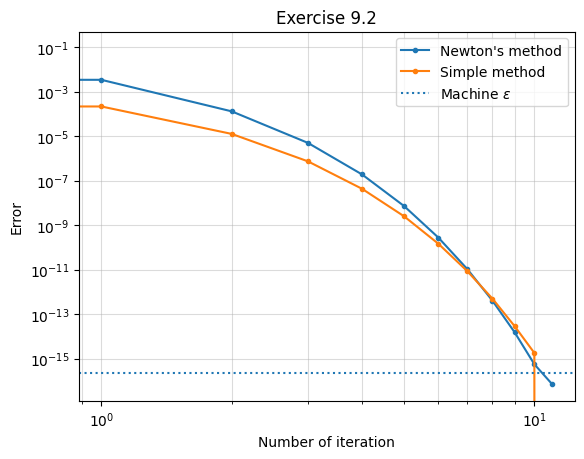

In [11]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
_ = ax.loglog(err_newton, marker='.', linestyle='-', label='Newton\'s method')
_ = ax.loglog(err_simple, marker='.', linestyle='-', label='Simple method')
_ = ax.axhline(MACHINE_EPS, linestyle=':', label='Machine $\epsilon$')
_ = ax.grid(alpha=.45, which='both')
_ = ax.set_xlabel('Number of iteration')
_ = ax.set_ylabel('Error')
_ = ax.set_title('Exercise 9.2')
_ = ax.legend()